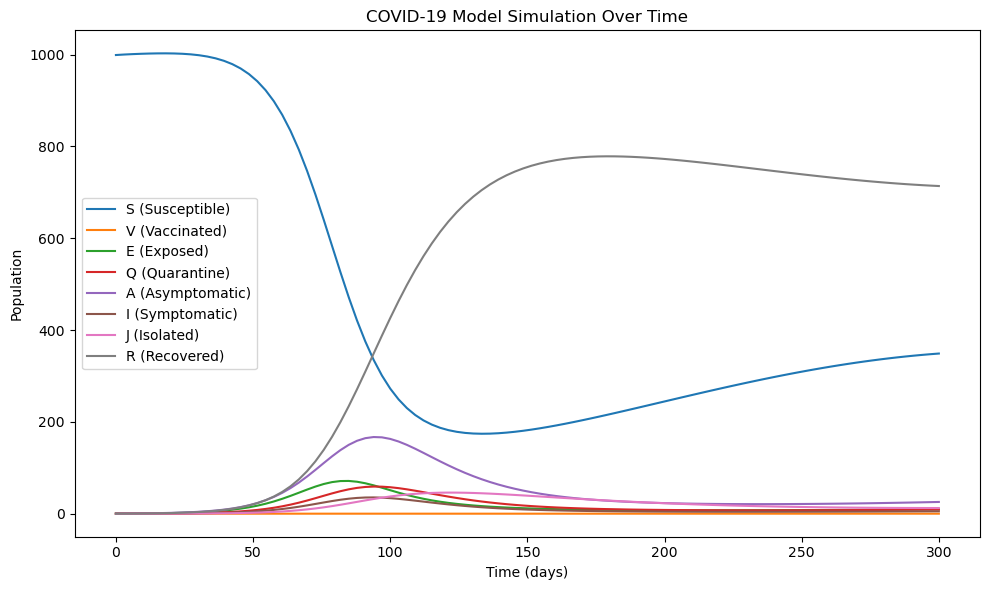

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters 
Λ =  0.46436 
μ = 4.563e-5  
α = 8.157e-7  
θ = 0.8 
d = 0.05
z = 1/14
c = 0.07
f = 0.8
g = 0.2471
r1 = 0.0714
r2 = 1/21
r3 = 0.02
δ = 0.0036
ϵ1 = 0.48 
ϵ2 = 0.48  
ϵm = 0.5  
cm = 0.5  
η = 0.04   
β = 0.512  
s = 0.3

# Initial conditions 
S0 = 999  
V0 = 0   
E0 = 1    
Q0 = 0
A0 = 0  
I0 = 0  
J0 = 0
R0 = 0    
N = S0 + V0  + E0  + Q0 + A0 + I0 + J0 + R0  

# Force of infection function (equation 3.12)
def infection_force(A, I, J):
    return β * ((1 - ϵm * cm) * (1 - s ) * (A + ϵ1 * I + ϵ2 * J  ))/N

# System of differential equations
def model(y, t):
    S, V,  E, Q, A, I, J, R = y
    λ = infection_force(A, I, J)

    dSdt = Λ + (1-d)*z*Q + δ * R  - (α + λ + μ) * S
    dVdt = α * S - (μ + (1 - θ) * λ) * V
    dEdt = λ * S + (1 - θ) * λ * V  - (μ + g + c) * E
    dQdt = c*E - (z + μ) * Q
    dAdt = f * g * E - (μ + r1) * A
    dIdt = (1 - f) * g * E - (μ + r2 + η) * I
    dJdt = η * I + d * z *Q - (r3 + μ) * J
    dRdt = r1 * A + r2 * I + r3 * J - (μ + δ) * R

    return [dSdt, dVdt, dEdt, dQdt, dAdt, dIdt, dJdt, dRdt]

# Time points (days)
t = np.linspace(0, 300, 100)  

# Initial condition vector
y0 = [S0, V0, E0, Q0, A0, I0, J0, R0]

# Solve ODE
solution = odeint(model, y0, t)
S, V, E, Q, A, I, J, R = solution.T

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='S (Susceptible)')
plt.plot(t, V, label='V (Vaccinated)')
plt.plot(t, E, label='E (Exposed)')
plt.plot(t, Q, label='Q (Quarantine)')
plt.plot(t, A, label='A (Asymptomatic)')
plt.plot(t, I, label='I (Symptomatic)')
plt.plot(t, J, label='J (Isolated)')
plt.plot(t, R, label='R (Recovered)')

# Customize plot
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('COVID-19 Model Simulation Over Time')
plt.legend(loc='best')
plt.grid(False)
plt.tight_layout()
plt.show()


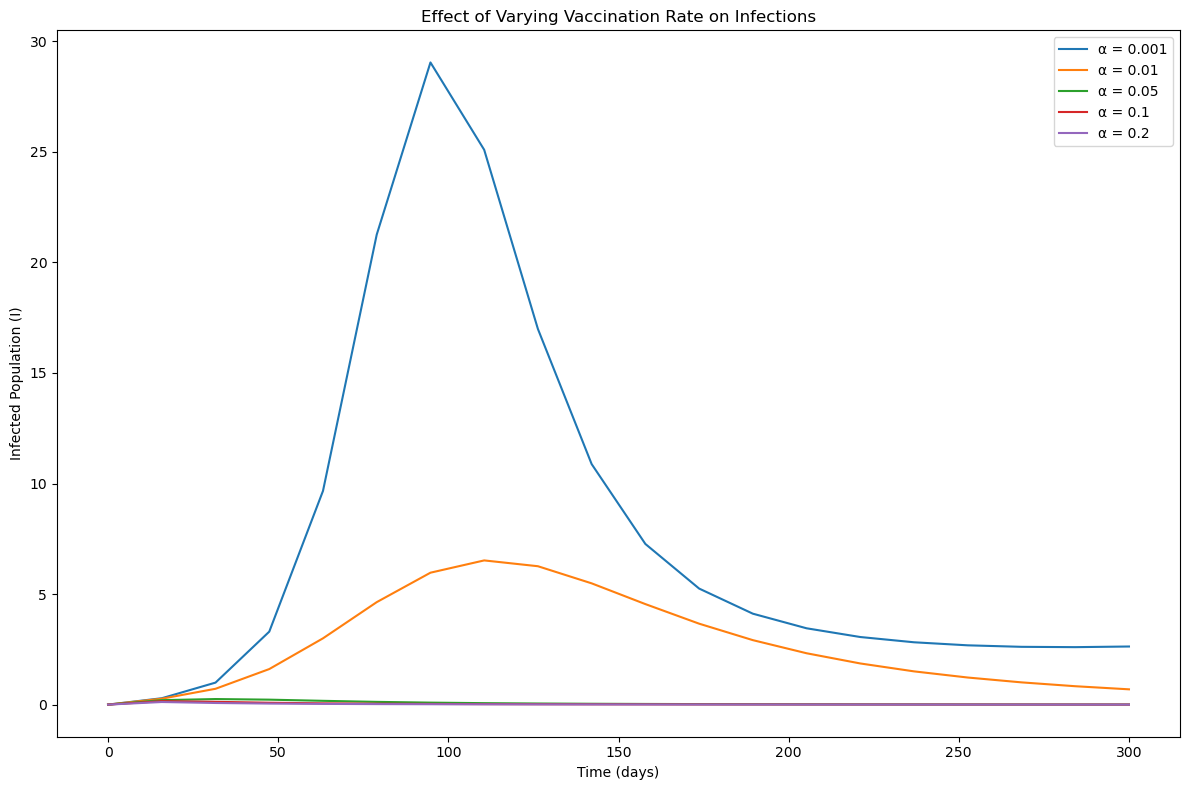

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters 
Λ =  0.00018  
μ = 4.563e-5  
α = 8.157e-7  
θ = 0.8  
d = 0.05
z = 1/14
c = 0.07
f = 0.8
g = 0.2471
r1 = 0.0714
r2 = 1/21
r3 = 0.02
δ = 0.0036
ϵ1 = 0.48  
ϵ2 = 0.48  
ϵm = 0.5  
cm = 0.5  
η = 0.04   
β = 0.512 
s = 0.3

# Initial conditions 
S0 = 999  
V0 = 0   
E0 = 1   
Q0 = 0
A0 = 0   
I0 = 0   
J0 = 0
R0 = 0   
N = S0 + V0 + E0 + Q0 + A0 + I0 + J0 + R0  

# Force of infection function (equation 3.12)
def infection_force(A, I, J):
    return β * ((1 - ϵm * cm) * (1 - s) * (A + ϵ1 * I + ϵ2 * J)) / N

# System of differential equations
def model(y, t, α):
    S, V, E, Q, A, I, J, R = y
    λ = infection_force(A, I, J)

    dSdt = Λ + (1-d)*z*Q + δ * R - (α + λ + μ) * S
    dVdt = α * S - (μ + (1 - θ) * λ) * V
    dEdt = λ * S + (1 - θ) * λ * V - (μ + g + c) * E
    dQdt = c * E - (z + μ) * Q
    dAdt = f * g * E - (μ + r1) * A
    dIdt = (1 - f) * g * E - (μ + r2 + η) * I
    dJdt = η * I + d * z * Q - (r3 + μ) * J
    dRdt = r1 * A + r2 * I + r3 * J - (μ + δ) * R

    return [dSdt, dVdt, dEdt, dQdt, dAdt, dIdt, dJdt, dRdt]

# Time points (days)
t = np.linspace(0, 300, 20)  

# Initial condition vector
y0 = [S0, V0, E0, Q0, A0, I0, J0, R0]

# Vaccination rates to analyze
vaccination_rates = [0.001, 0.01, 0.05, 0.1, 0.2]

# Solve the model for each vaccination rate
results = {}
for α in vaccination_rates:
    solution = odeint(model, y0, t, args=(α,))
    results[α] = solution

# Plotting the results
plt.figure(figsize=(12, 8))

for α, solution in results.items():
    S, V, E, Q, A, I, J, R = solution.T
    plt.plot(t, I, label=f'α = {α}')

# Customize plot
plt.xlabel('Time (days)')
plt.ylabel('Infected Population (I)')
plt.title('Effect of Varying Vaccination Rate on Infections')
plt.legend(loc='best')
plt.grid(False)
plt.tight_layout()
plt.show()


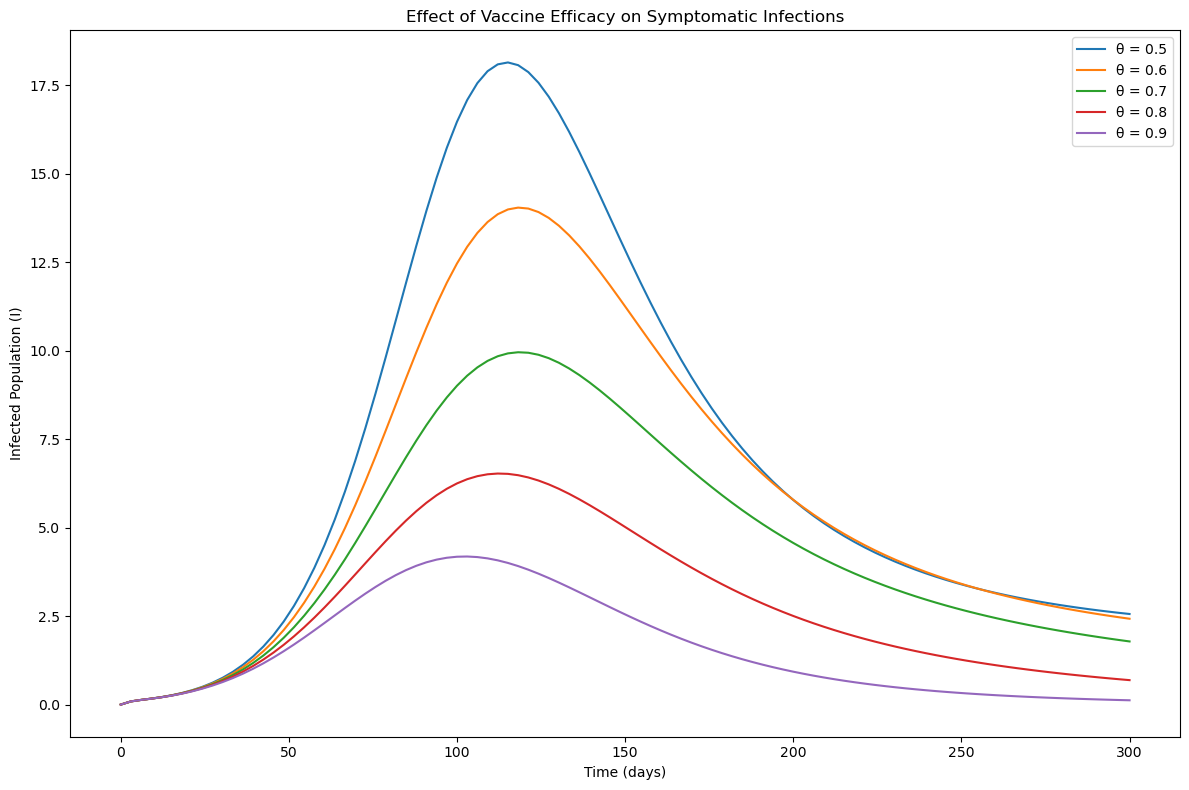

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters 
Λ = 0.00018  
μ = 4.563e-5  
α = 0.01  
d = 0.05
z = 1 / 14
c = 0.07
f = 0.8
g = 0.2471
r1 = 0.0714
r2 = 1 / 21
r3 = 0.02
δ = 0.0036
ϵ1 = 0.48  
ϵ2 = 0.48  
ϵm = 0.5  
cm = 0.5  
η = 0.04
β = 0.512  
s = 0.3

# Initial conditions 
S0 = 999  
V0 = 0  
E0 = 1  
Q0 = 0
A0 = 0  
I0 = 0  
J0 = 0
R0 = 0  
N = S0 + V0 + E0 + Q0 + A0 + I0 + J0 + R0  

# Force of infection function (equation 3.12)
def infection_force(A, I, J):
    return β * ((1 - ϵm * cm) * (1 - s) * (A + ϵ1 * I + ϵ2 * J)) / N

# System of differential equations
def model(y, t, θ):
    S, V, E, Q, A, I, J, R = y
    λ = infection_force(A, I, J)

    dSdt = Λ + (1 - d) * z * Q + δ * R - (α + λ + μ) * S
    dVdt = α * S - (μ + (1 - θ) * λ) * V
    dEdt = λ * S + (1 - θ) * λ * V - (μ + g + c) * E
    dQdt = c * E - (z + μ) * Q
    dAdt = f * g * E - (μ + r1) * A
    dIdt = (1 - f) * g * E - (μ + r2 + η) * I
    dJdt = η * I + d * z * Q - (r3 + μ) * J
    dRdt = r1 * A + r2 * I + r3 * J - (μ + δ) * R

    return [dSdt, dVdt, dEdt, dQdt, dAdt, dIdt, dJdt, dRdt]

# Time points (days)
t = np.linspace(0, 300, 100)  # Adjust for your simulation period

# Initial condition vector
y0 = [S0, V0, E0, Q0, A0, I0, J0, R0]

# Vaccine efficacy rates to analyze
vaccine_efficacy = [0.5, 0.6, 0.7, 0.8, 0.9]

# Solve the model for each vaccine efficacy rate
results = {}
for θ in vaccine_efficacy:
    solution = odeint(model, y0, t, args=(θ,))
    results[θ] = solution

# Plotting the results
plt.figure(figsize=(12, 8))

for θ, solution in results.items():
    S, V, E, Q, A, I, J, R = solution.T
    plt.plot(t, I, label=f'θ = {θ:.1f}')

# Customize plot
plt.xlabel('Time (days)')
plt.ylabel('Infected Population (I)')
plt.title('Effect of Vaccine Efficacy on Symptomatic Infections')
plt.legend(loc='best')
plt.grid(False)
plt.tight_layout()
plt.show()


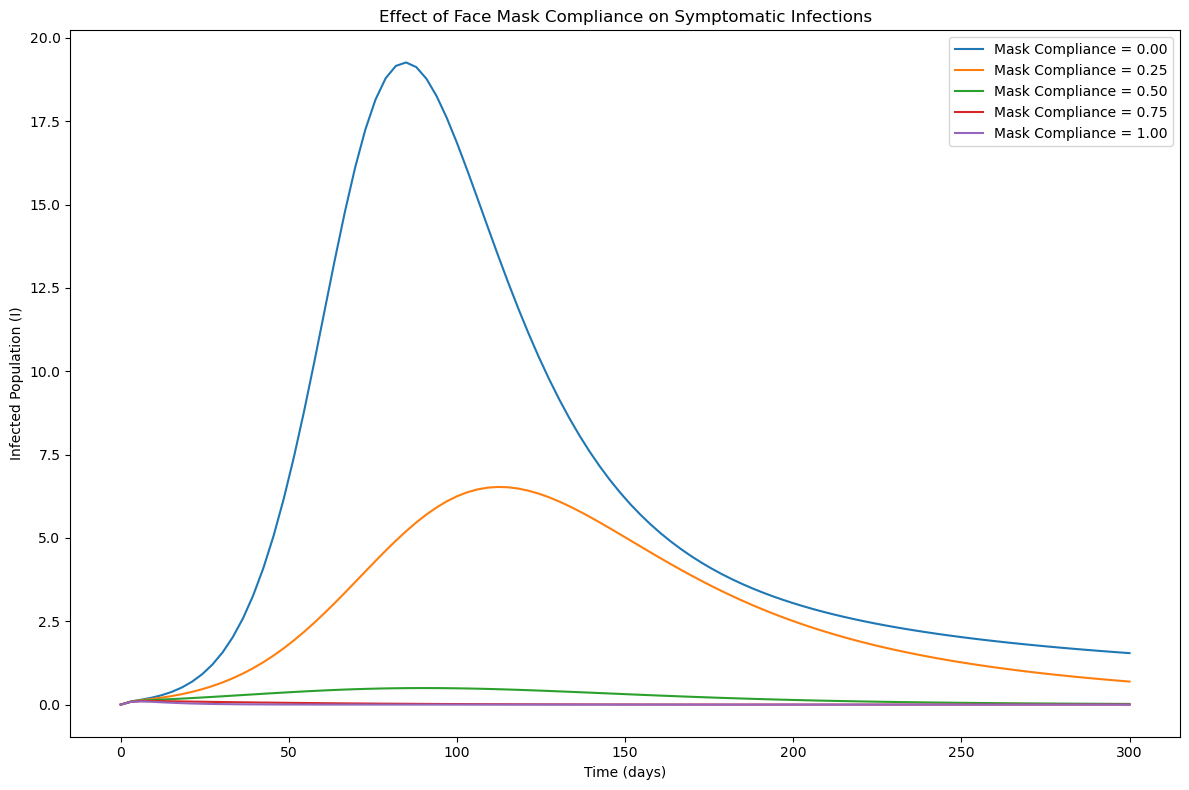

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters 
Λ = 0.00018  
μ = 4.563e-5  # Natural death rate
α = 0.01  # Fixed vaccination rate
θ = 0.8  # Vaccine efficacy
d = 0.05
z = 1 / 14
c = 0.07
f = 0.8
g = 0.2471
r1 = 0.0714
r2 = 1 / 21
r3 = 0.02
δ = 0.0036
ϵ1 = 0.48  
ϵ2 = 0.48  
η = 0.04
β = 0.512  # Effective contact rate
s = 0.3

# Initial conditions 
S0 = 999  # Susceptible individuals
V0 = 0  # Vaccinated (first dose)
E0 = 1  # Exposed individuals
Q0 = 0
A0 = 0  # Asymptomatic infected individuals
I0 = 0  # Symptomatic infected individuals
J0 = 0
R0 = 0  # Recovered individuals
N = S0 + V0 + E0 + Q0 + A0 + I0 + J0 + R0  # Total population

# Force of infection function with mask compliance
def infection_force(A, I, J, ϵm):
    return β * ((1 - ϵm) * (1 - s) * (A + ϵ1 * I + ϵ2 * J)) / N

# System of differential equations
def model(y, t, ϵm):
    S, V, E, Q, A, I, J, R = y
    λ = infection_force(A, I, J, ϵm)

    dSdt = Λ + (1 - d) * z * Q + δ * R - (α + λ + μ) * S
    dVdt = α * S - (μ + (1 - θ) * λ) * V
    dEdt = λ * S + (1 - θ) * λ * V - (μ + g + c) * E
    dQdt = c * E - (z + μ) * Q
    dAdt = f * g * E - (μ + r1) * A
    dIdt = (1 - f) * g * E - (μ + r2 + η) * I
    dJdt = η * I + d * z * Q - (r3 + μ) * J
    dRdt = r1 * A + r2 * I + r3 * J - (μ + δ) * R

    return [dSdt, dVdt, dEdt, dQdt, dAdt, dIdt, dJdt, dRdt]

# Time points (days)
t = np.linspace(0, 300, 100)  

# Initial condition vector
y0 = [S0, V0, E0, Q0, A0, I0, J0, R0]

# Mask compliance rates to analyze
mask_compliance = [0.0, 0.25, 0.5, 0.75, 1.0]  # From no masks to full compliance

# Solving the model for each mask compliance rate
results = {}
for ϵm in mask_compliance:
    solution = odeint(model, y0, t, args=(ϵm,))
    results[ϵm] = solution

# Plotting the results
plt.figure(figsize=(12, 8))

for ϵm, solution in results.items():
    S, V, E, Q, A, I, J, R = solution.T
    plt.plot(t, I, label=f'Mask Compliance = {ϵm:.2f}')

# Customize plot
plt.xlabel('Time (days)')
plt.ylabel('Infected Population (I)')
plt.title('Effect of Face Mask Compliance on Symptomatic Infections')
plt.legend(loc='best')
plt.grid(False)
plt.tight_layout()
plt.show()


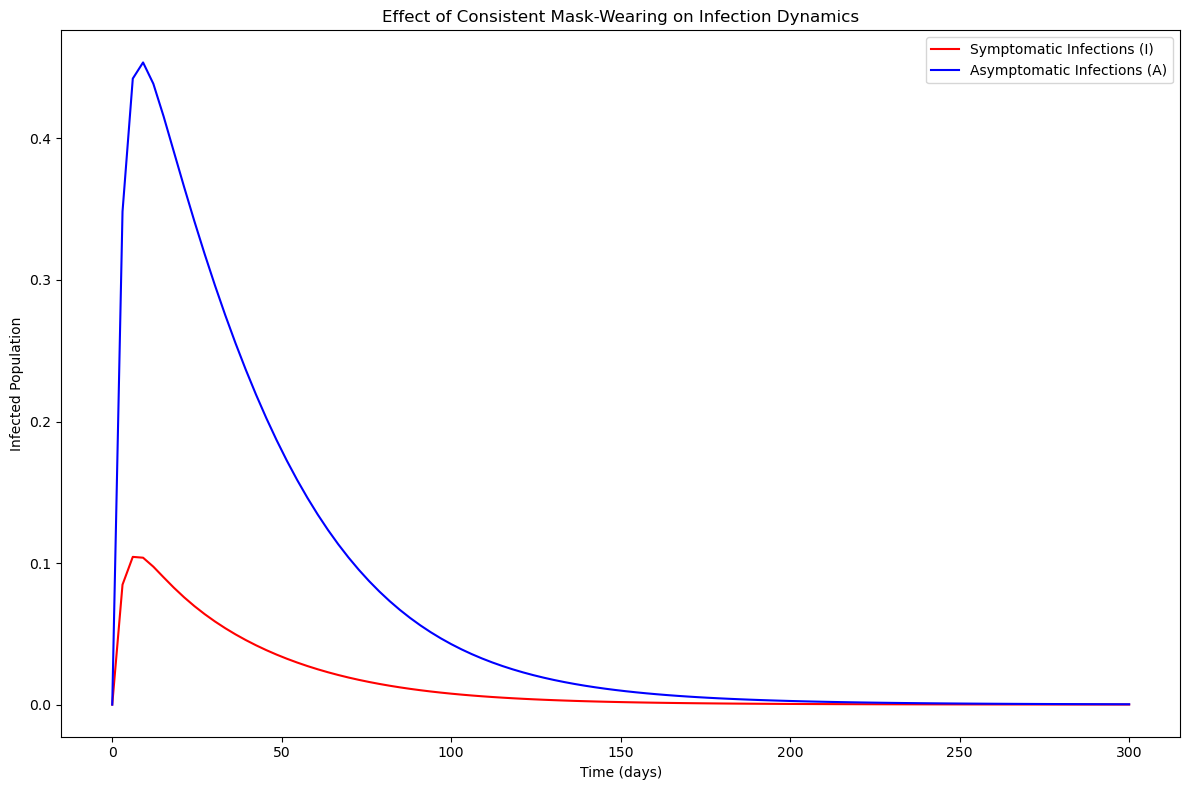

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
Λ = 0.00018  
μ = 4.563e-5  # Natural death rate
α = 0.01  # Fixed vaccination rate
θ = 0.8  # Vaccine efficacy
d = 0.05
z = 1 / 14
c = 0.07
f = 0.8
g = 0.2471
r1 = 0.0714
r2 = 1 / 21
r3 = 0.02
δ = 0.0036
ϵ1 = 0.48  
ϵ2 = 0.48  
η = 0.04
β = 0.512  # Effective contact rate
s = 0.3

# Initial conditions
S0 = 999  # Susceptible individuals
V0 = 0  # Vaccinated individuals
E0 = 1  # Exposed individuals
Q0 = 0
A0 = 0  # Asymptomatic infected individuals
I0 = 0  # Symptomatic infected individuals
J0 = 0
R0 = 0  # Recovered individuals
N = S0 + V0 + E0 + Q0 + A0 + I0 + J0 + R0  # Total population

# Consistent mask-wearing (fixed compliance rate)
consistent_mask_compliance = 0.8  

# Force of infection function with consistent mask-wearing
def infection_force(A, I, J):
    return β * (1 - consistent_mask_compliance) * (1 - s) * (A + ϵ1 * I + ϵ2 * J) / N

# System of differential equations
def model(y, t):
    S, V, E, Q, A, I, J, R = y
    λ = infection_force(A, I, J)

    dSdt = Λ + (1 - d) * z * Q + δ * R - (α + λ + μ) * S
    dVdt = α * S - (μ + (1 - θ) * λ) * V
    dEdt = λ * S + (1 - θ) * λ * V - (μ + g + c) * E
    dQdt = c * E - (z + μ) * Q
    dAdt = f * g * E - (μ + r1) * A
    dIdt = (1 - f) * g * E - (μ + r2 + η) * I
    dJdt = η * I + d * z * Q - (r3 + μ) * J
    dRdt = r1 * A + r2 * I + r3 * J - (μ + δ) * R

    return [dSdt, dVdt, dEdt, dQdt, dAdt, dIdt, dJdt, dRdt]

# Time points (days)
t = np.linspace(0, 300, 100)  
# Initial condition vector
y0 = [S0, V0, E0, Q0, A0, I0, J0, R0]

# Solve ODE
solution = odeint(model, y0, t)
S, V, E, Q, A, I, J, R = solution.T

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot for symptomatic infections (I) and asymptomatic infections (A)
plt.plot(t, I, label='Symptomatic Infections (I)', color='red')
plt.plot(t, A, label='Asymptomatic Infections (A)', color='blue')

# Customize plot
plt.xlabel('Time (days)')
plt.ylabel('Infected Population')
plt.title('Effect of Consistent Mask-Wearing on Infection Dynamics')
plt.legend(loc='best')
plt.grid(False)
plt.tight_layout()
plt.show()



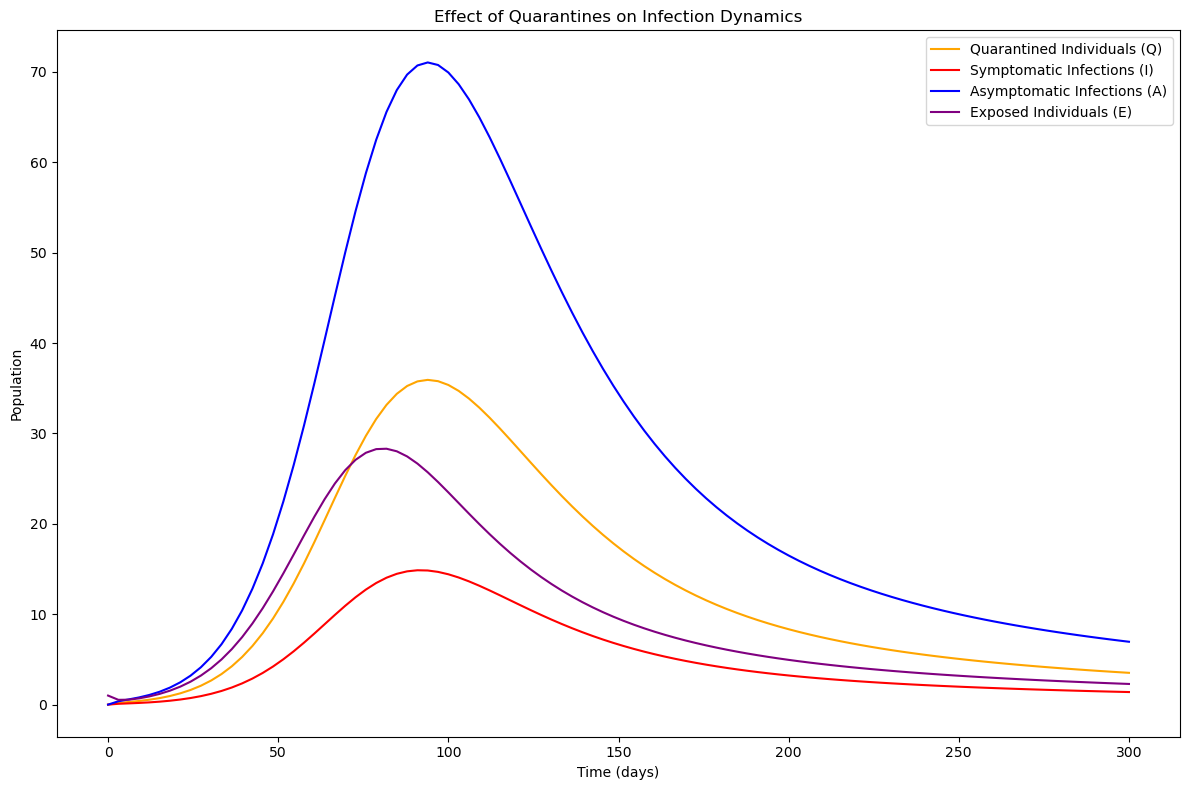

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
Λ = 0.00018  
μ = 4.563e-5  # Natural death rate
α = 0.01  # Fixed vaccination rate
θ = 0.8  # Vaccine efficacy
d = 0.05
z = 1 / 14  # Rate of leaving quarantine
c = 0.1  # Quarantine rate 
f = 0.8
g = 0.2471
r1 = 0.0714
r2 = 1 / 21
r3 = 0.02
δ = 0.0036
ϵ1 = 0.48  
ϵ2 = 0.48  
η = 0.04
β = 0.512  # Effective contact rate
s = 0.3

# Initial conditions
S0 = 999  # Susceptible individuals
V0 = 0  # Vaccinated individuals
E0 = 1  # Exposed individuals
Q0 = 0  # Quarantined individuals
A0 = 0  # Asymptomatic infected individuals
I0 = 0  # Symptomatic infected individuals
J0 = 0  # Isolated individuals
R0 = 0  # Recovered individuals
N = S0 + V0 + E0 + Q0 + A0 + I0 + J0 + R0  # Total population

# Force of infection function
def infection_force(A, I, J):
    return β * (1 - s) * (A + ϵ1 * I + ϵ2 * J) / N

# System of differential equations
def model(y, t):
    S, V, E, Q, A, I, J, R = y
    λ = infection_force(A, I, J)

    dSdt = Λ + (1 - d) * z * Q + δ * R - (α + λ + μ) * S
    dVdt = α * S - (μ + (1 - θ) * λ) * V
    dEdt = λ * S + (1 - θ) * λ * V - (μ + g + c) * E
    dQdt = c * E - (z + μ) * Q
    dAdt = f * g * E - (μ + r1) * A
    dIdt = (1 - f) * g * E - (μ + r2 + η) * I
    dJdt = η * I + d * z * Q - (r3 + μ) * J
    dRdt = r1 * A + r2 * I + r3 * J - (μ + δ) * R

    return [dSdt, dVdt, dEdt, dQdt, dAdt, dIdt, dJdt, dRdt]

# Time points (days)
t = np.linspace(0, 300, 100)  

# Initial condition vector
y0 = [S0, V0, E0, Q0, A0, I0, J0, R0]

# Solve ODE
solution = odeint(model, y0, t)
S, V, E, Q, A, I, J, R = solution.T

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot quarantined individuals and other compartments
plt.plot(t, Q, label='Quarantined Individuals (Q)', color='orange')
plt.plot(t, I, label='Symptomatic Infections (I)', color='red')
plt.plot(t, A, label='Asymptomatic Infections (A)', color='blue')
plt.plot(t, E, label='Exposed Individuals (E)', color='purple')

# Customize plot
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Effect of Quarantines on Infection Dynamics')
plt.legend(loc='best')
plt.grid(False)
plt.tight_layout()
plt.show()


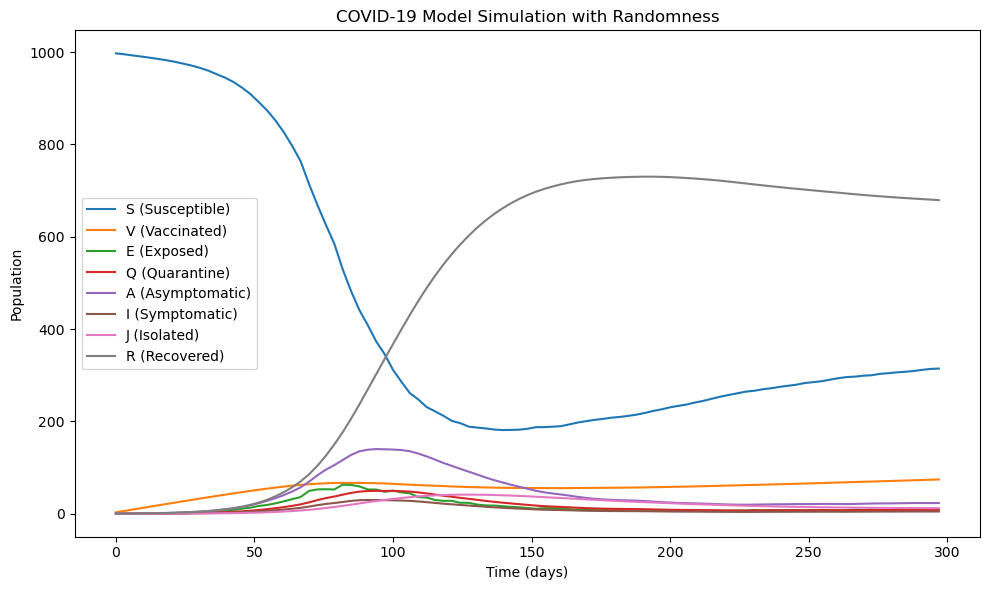

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters 
Λ = 0.46436  
μ_mean = 4.563e-5  
μ_std = 1e-6  
α = 0.001  
θ = 0.8  # Vaccine efficacy for V
d = 0.05
z = 1/14
c = 0.07
f = 0.8
g = 0.2471
r1 = 0.0714
r2 = 1/21
r3 = 0.02
δ = 0.0036
ϵ1 = 0.48  
ϵ2 = 0.48  
ϵm = 0.5  
cm = 0.5  
η = 0.04   
β_mean = 0.512  # Mean effective contact rate
β_std = 0.05  # Standard deviation for contact rate
s = 0.3

# Initial conditions
S0 = 999
V0 = 0
E0 = 1
Q0 = 0
A0 = 0
I0 = 0
J0 = 0
R0 = 0
N = S0 + V0 + E0 + Q0 + A0 + I0 + J0 + R0

# Force of infection function
def infection_force(A, I, J, β):
    return β * ((1 - ϵm * cm) * (1 - s) * (A + ϵ1 * I + ϵ2 * J)) / N

# System of differential equations
def model(y, t, β, μ):
    S, V, E, Q, A, I, J, R = y
    λ = infection_force(A, I, J, β)

    dSdt = Λ + (1 - d) * z * Q + δ * R - (α + λ + μ) * S
    dVdt = α * S - (μ + (1 - θ) * λ) * V
    dEdt = λ * S + (1 - θ) * λ * V - (μ + g + c) * E
    dQdt = c * E - (z + μ) * Q
    dAdt = f * g * E - (μ + r1) * A
    dIdt = (1 - f) * g * E - (μ + r2 + η) * I
    dJdt = η * I + d * z * Q - (r3 + μ) * J
    dRdt = r1 * A + r2 * I + r3 * J - (μ + δ) * R

    return [dSdt, dVdt, dEdt, dQdt, dAdt, dIdt, dJdt, dRdt]

# Time points (days)
t = np.linspace(0, 300, 100)

# Initial condition vector
y0 = [S0, V0, E0, Q0, A0, I0, J0, R0]

# Initialize arrays to store results
results = []

# Loop with random parameter variation
for i in range(len(t) - 1):
    # Sample random parameters
    β = np.random.normal(β_mean, β_std)  # Random β
    μ = np.random.normal(μ_mean, μ_std)  # Random μ

    # Solve ODE for a short time step
    t_step = [t[i], t[i + 1]]
    y = odeint(model, y0, t_step, args=(β, μ))
    results.append(y[1])  
    y0 = y[1] 

# Convert results to arrays
results = np.array(results)
S, V, E, Q, A, I, J, R = results.T

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t[:-1], S, label='S (Susceptible)')
plt.plot(t[:-1], V, label='V (Vaccinated)')
plt.plot(t[:-1], E, label='E (Exposed)')
plt.plot(t[:-1], Q, label='Q (Quarantine)')
plt.plot(t[:-1], A, label='A (Asymptomatic)')
plt.plot(t[:-1], I, label='I (Symptomatic)')
plt.plot(t[:-1], J, label='J (Isolated)')
plt.plot(t[:-1], R, label='R (Recovered)')

# Customize plot
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('COVID-19 Model Simulation with Randomness')
plt.legend(loc='best')
plt.grid(False)
plt.tight_layout()
plt.show()


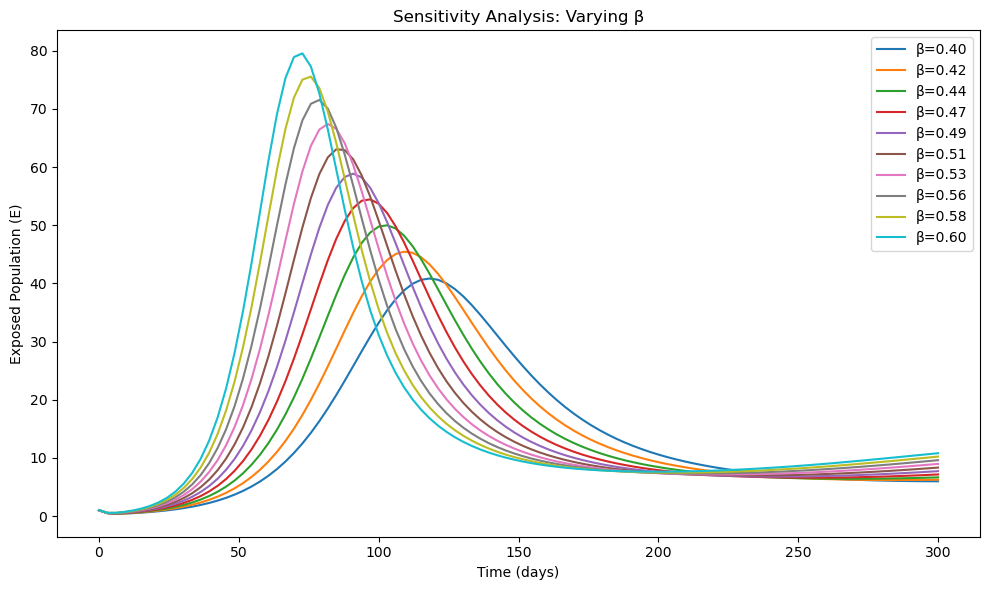

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters 
Λ = 0.46436  
μ = 4.563e-5  # Natural death rate
α = 0.001  
θ = 0.8  # Vaccine efficacy for V
d = 0.05
z = 1 / 14
c = 0.07
f = 0.8
g = 0.2471
r1 = 0.0714
r2 = 1 / 21
r3 = 0.02
δ = 0.0036
ϵ1 = 0.48  
ϵ2 = 0.48  
ϵm = 0.5  
cm = 0.5  
η = 0.04
β = 0.512  # Effective contact rate
s = 0.3

# Initial conditions
S0 = 999  # Susceptible individuals
V0 = 0    # Vaccinated (first dose)
E0 = 1    # Exposed individuals
Q0 = 0
A0 = 0    # Asymptomatic infected individuals
I0 = 0    # Symptomatic infected individuals
J0 = 0
R0 = 0    # Recovered individuals
N = S0 + V0 + E0 + Q0 + A0 + I0 + J0 + R0  # Total population
y0 = [S0, V0, E0, Q0, A0, I0, J0, R0]  # Initial condition vector

# Time points
t = np.linspace(0, 300, 100)  # Simulate for 300 days with 100 time points

# Sensitivity analysis function
def sensitivity_analysis(param_name, param_values, initial_conditions, t, baseline_params):
    results = []
    for value in param_values:
        # Update the parameter value
        params = baseline_params.copy()
        params[param_name] = value

        # Update infection force function
        def infection_force_sens(A, I, J, params):
            return params['β'] * ((1 - params['ϵm'] * params['cm']) * 
                                  (1 - params['s']) * (A + params['ϵ1'] * I + params['ϵ2'] * J)) / N

        # Update model with new parameters
        def model_sens(y, t):
            S, V, E, Q, A, I, J, R = y
            λ = infection_force_sens(A, I, J, params)

            dSdt = params['Λ'] + (1 - params['d']) * params['z'] * Q + params['δ'] * R - (params['α'] + λ + params['μ']) * S
            dVdt = params['α'] * S - (params['μ'] + (1 - params['θ']) * λ) * V
            dEdt = λ * S + (1 - params['θ']) * λ * V - (params['μ'] + params['g'] + params['c']) * E
            dQdt = params['c'] * E - (params['z'] + params['μ']) * Q
            dAdt = params['f'] * params['g'] * E - (params['μ'] + params['r1']) * A
            dIdt = (1 - params['f']) * params['g'] * E - (params['μ'] + params['r2'] + params['η']) * I
            dJdt = params['η'] * I + params['d'] * params['z'] * Q - (params['r3'] + params['μ']) * J
            dRdt = params['r1'] * A + params['r2'] * I + params['r3'] * J - (params['μ'] + params['δ']) * R

            return [dSdt, dVdt, dEdt, dQdt, dAdt, dIdt, dJdt, dRdt]

        # Solve the model for this parameter value
        solution = odeint(model_sens, initial_conditions, t)
        results.append(solution[:, 2])  

    return results

# Define baseline parameters as a dictionary
baseline_params = {
    'Λ': Λ, 'μ': μ, 'α': α, 'θ': θ, 'd': d, 'z': z, 'c': c, 'f': f, 'g': g,
    'r1': r1, 'r2': r2, 'r3': r3, 'δ': δ, 'ϵ1': ϵ1, 'ϵ2': ϵ2, 'ϵm': ϵm,
    'cm': cm, 'η': η, 'β': β, 's': s
}

# Perform sensitivity analysis for parameter 'β'
param_name = 'β'
param_values = np.linspace(0.4, 0.6, 10)  # Vary 'β' between 0.4 and 0.6
sensitivity_results = sensitivity_analysis(param_name, param_values, y0, t, baseline_params)

# Plot sensitivity results
plt.figure(figsize=(10, 6))
for i, value in enumerate(param_values):
    plt.plot(t, sensitivity_results[i], label=f'{param_name}={value:.2f}')

plt.xlabel('Time (days)')
plt.ylabel('Exposed Population (E)')
plt.title(f'Sensitivity Analysis: Varying {param_name}')
plt.legend(loc='best')
plt.grid(False)
plt.tight_layout()
plt.show()


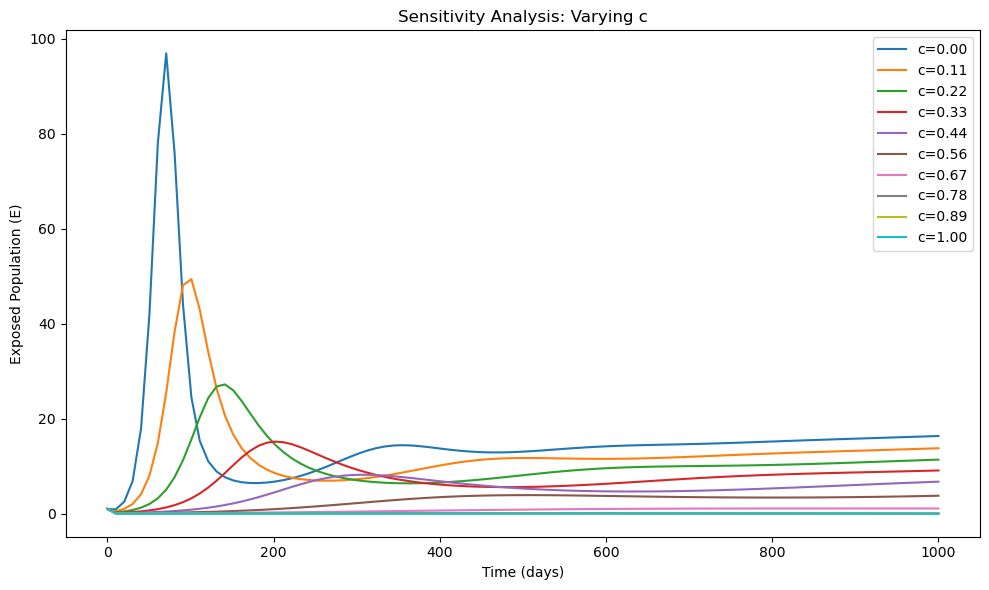

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters 
Λ = 0.46436  
μ = 4.563e-5  # Natural death rate
α = 0.001  
θ = 0.8  # Vaccine efficacy for V
d = 0.05
z = 1 / 14
c = 0.07
f = 0.8
g = 0.2471
r1 = 0.0714
r2 = 1 / 21
r3 = 0.02
δ = 0.0036
ϵ1 = 0.48  
ϵ2 = 0.48  
ϵm = 0.5  
cm = 0.5 
η = 0.04
β = 0.512  # Effective contact rate
s = 0.3

# Initial conditions
S0 = 999  # Susceptible individuals
V0 = 0    # Vaccinated (first dose)
E0 = 1    # Exposed individuals
Q0 = 0
A0 = 0    # Asymptomatic infected individuals
I0 = 0    # Symptomatic infected individuals
J0 = 0
R0 = 0    # Recovered individuals
N = S0 + V0 + E0 + Q0 + A0 + I0 + J0 + R0  # Total population
y0 = [S0, V0, E0, Q0, A0, I0, J0, R0]  # Initial condition vector

# Time points
t = np.linspace(0, 1000, 100)  

# Sensitivity analysis function
def sensitivity_analysis(param_name, param_values, initial_conditions, t, baseline_params):
    results = []
    for value in param_values:
        # Update the parameter value
        params = baseline_params.copy()
        params[param_name] = value

        # Update infection force function
        def infection_force_sens(A, I, J, params):
            return params['β'] * ((1 - params['ϵm'] * params['cm']) * 
                                  (1 - params['s']) * (A + params['ϵ1'] * I + params['ϵ2'] * J)) / N

        # Update model with new parameters
        def model_sens(y, t):
            S, V, E, Q, A, I, J, R = y
            λ = infection_force_sens(A, I, J, params)

            dSdt = params['Λ'] + (1 - params['d']) * params['z'] * Q + params['δ'] * R - (params['α'] + λ + params['μ']) * S
            dVdt = params['α'] * S - (params['μ'] + (1 - params['θ']) * λ) * V
            dEdt = λ * S + (1 - params['θ']) * λ * V - (params['μ'] + params['g'] + params['c']) * E
            dQdt = params['c'] * E - (params['z'] + params['μ']) * Q
            dAdt = params['f'] * params['g'] * E - (params['μ'] + params['r1']) * A
            dIdt = (1 - params['f']) * params['g'] * E - (params['μ'] + params['r2'] + params['η']) * I
            dJdt = params['η'] * I + params['d'] * params['z'] * Q - (params['r3'] + params['μ']) * J
            dRdt = params['r1'] * A + params['r2'] * I + params['r3'] * J - (params['μ'] + params['δ']) * R

            return [dSdt, dVdt, dEdt, dQdt, dAdt, dIdt, dJdt, dRdt]

        # Solve the model for this parameter value
        solution = odeint(model_sens, initial_conditions, t)
        results.append(solution[:, 2])  

    return results

# Define baseline parameters as a dictionary
baseline_params = {
    'Λ': Λ, 'μ': μ, 'α': α, 'θ': θ, 'd': d, 'z': z, 'c': c, 'f': f, 'g': g,
    'r1': r1, 'r2': r2, 'r3': r3, 'δ': δ, 'ϵ1': ϵ1, 'ϵ2': ϵ2, 'ϵm': ϵm,
    'cm': cm, 'η': η, 'β': β, 's': s
}

# Perform sensitivity analysis for parameter 'β'
param_name = 'c'
param_values = np.linspace(0.0, 1.0, 10)  # Vary 'β' between 0.4 and 0.6
sensitivity_results = sensitivity_analysis(param_name, param_values, y0, t, baseline_params)

# Plot sensitivity results
plt.figure(figsize=(10, 6))
for i, value in enumerate(param_values):
    plt.plot(t, sensitivity_results[i], label=f'{param_name}={value:.2f}')

plt.xlabel('Time (days)')
plt.ylabel('Exposed Population (E)')
plt.title(f'Sensitivity Analysis: Varying {param_name}')
plt.legend(loc='best')
plt.grid(False)
plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import latin
from SALib.analyze import morris

# Define the model
def model(params):
    # Unpack parameters
    Λ, μ, d, z, c, f, r1, r2, r3, η, δ, β, ε1, ε2, εm, cm, θ = params
    # Initial conditions
    S, V, E, Q, A, I, J, R = 1000, 0, 0, 0, 0, 1, 0, 0
    t_max = 100
    dt = 0.1
    time = np.arange(0, t_max, dt)
    N = S + V + E + Q + A + I + J + R
    
    for _ in time:
        λ = β * (1 - εm * cm) * (A + ε1 * I + ε2 * J) / N
        dS = Λ + (1 - d) * z * Q + δ * R - (λ + α + μ) * S
        dV = α * S - (μ + (1 - θ) * λ) * V
        dE = λ * S + (1 - θ) * λ * V - (μ + g + c) * E
        dQ = c * E - (μ + z) * Q
        dA = f * g * E - (μ + r1) * A
        dI = (1 - f) * g * E - (μ + r2 + η) * I
        dJ = η * I + d * z * Q - (μ + r3) * J
        dR = r1 * A + r2 * I + r3 * J - (μ + δ) * R
        
        S += dS * dt
        V += dV * dt
        E += dE * dt
        Q += dQ * dt
        A += dA * dt
        I += dI * dt
        J += dJ * dt
        R += dR * dt
        N = S + V + E + Q + A + I + J + R
    
    return R  
# Define parameter space
problem = {
    'num_vars': 17,
    'names': ['Λ', 'μ', 'd', 'z', 'c', 'f', 'r1', 'r2', 'r3', 'η', 'δ', 'β', 'ε1', 'ε2', 'εm', 'cm', 'θ'],
    'bounds': [
        [0.4, 0.5], [4.5e-5, 5e-5], [0.04, 0.06], [0.07, 0.08], [0.06, 0.08],
        [0.6, 0.8], [0.07, 0.08], [1/22, 1/20], [0.019, 0.021], [0.9, 0.98],
        [0.003, 0.004], [0.5, 0.6], [0.4, 0.5], [0.4, 0.5], [0.4, 0.6],
        [0.09, 0.11], [0.7, 0.9]
    ]
}

# Generate samples
param_values = latin.sample(problem, 1000)

# Run the model
Y = np.array([model(params) for params in param_values])

# Analyze using PRCC
sa = morris.analyze(problem, param_values, Y, conf_level=0.95, print_to_console=True)

# Plot PRCC results
plt.figure(figsize=(10, 6))
plt.barh(problem['names'], sa['mu_star'], color='skyblue', edgecolor='black')
plt.xlabel('PRCC Value')
plt.title('Sensitivity Analysis (PRCC)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'SALib'

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import latin
from SALib.analyze import morris

# Define the model
def model(params):
    # Unpack parameters
    Λ, μ, d, z, c, f, r1, r2, r3, η, δ, β, ε1, ε2, εm, cm, θ = params
    # Initial conditions
    S, V, E, Q, A, I, J, R = 1000, 0, 0, 0, 0, 1, 0, 0
    t_max = 100
    dt = 0.1
    time = np.arange(0, t_max, dt)
    N = S + V + E + Q + A + I + J + R
    
    for _ in time:
        λ = β * (1 - εm * cm) * (A + ε1 * I + ε2 * J) / N
        dS = Λ + (1 - d) * z * Q + δ * R - (λ + α + μ) * S
        dV = α * S - (μ + (1 - θ) * λ) * V
        dE = λ * S + (1 - θ) * λ * V - (μ + g + c) * E
        dQ = c * E - (μ + z) * Q
        dA = f * g * E - (μ + r1) * A
        dI = (1 - f) * g * E - (μ + r2 + η) * I
        dJ = η * I + d * z * Q - (μ + r3) * J
        dR = r1 * A + r2 * I + r3 * J - (μ + δ) * R
        
        S += dS * dt
        V += dV * dt
        E += dE * dt
        Q += dQ * dt
        A += dA * dt
        I += dI * dt
        J += dJ * dt
        R += dR * dt
        N = S + V + E + Q + A + I + J + R
    
    return R  # Return the output of interest (e.g., recovered individuals)

# Define parameter space
problem = {
    'num_vars': 17,
    'names': ['Λ', 'μ', 'd', 'z', 'c', 'f', 'r1', 'r2', 'r3', 'η', 'δ', 'β', 'ε1', 'ε2', 'εm', 'cm', 'θ'],
    'bounds': [
        [0.4, 0.5], [4.5e-5, 5e-5], [0.04, 0.06], [0.07, 0.08], [0.06, 0.08],
        [0.6, 0.8], [0.07, 0.08], [1/22, 1/20], [0.019, 0.021], [0.9, 0.98],
        [0.003, 0.004], [0.5, 0.6], [0.4, 0.5], [0.4, 0.5], [0.4, 0.6],
        [0.09, 0.11], [0.7, 0.9]
    ]
}

# Generate samples
param_values = latin.sample(problem, 1000)

# Run the model
Y = np.array([model(params) for params in param_values])

# Analyze using PRCC
sa = morris.analyze(problem, param_values, Y, conf_level=0.95, print_to_console=True)

# Plot PRCC results
plt.figure(figsize=(10, 6))
plt.barh(problem['names'], sa['mu_star'], color='skyblue', edgecolor='black')
plt.xlabel('PRCC Value')
plt.title('Sensitivity Analysis (PRCC)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


NameError: name 'α' is not defined

            mu     mu_star       sigma  mu_star_conf
Λ    -3.072797   66.775474   89.299461     15.741225
μ    -5.791866   77.627691  102.374189     17.778396
d    14.816762   68.785702   92.403583     17.917967
z    12.931132   72.709369   94.257790     17.276489
c   -30.919471   63.868039   75.357274     14.271556
f     9.328667   57.335542   69.059545     10.808472
r1   -5.624592   59.449908   74.632312     11.452785
r2  -22.632362   67.021866   86.588158     16.388949
r3   -4.972646   69.995006   90.481202     16.423450
η    -9.711722   60.398236   77.592254     14.610187
δ     7.253197   53.579302   66.622956     11.180271
β   173.878284  173.878284   77.305611     19.777465
ε1    6.938644   73.177222   97.736953     15.998098
ε2   17.098625   52.851465   64.893325     10.187458
εm  -23.569986   64.355182   89.482365     19.118033
cm   10.078676   62.558361   91.914440     18.753820
θ   -69.431102   97.891908   99.621241     18.037164
α   -44.002639   62.501555   75.134358     16.

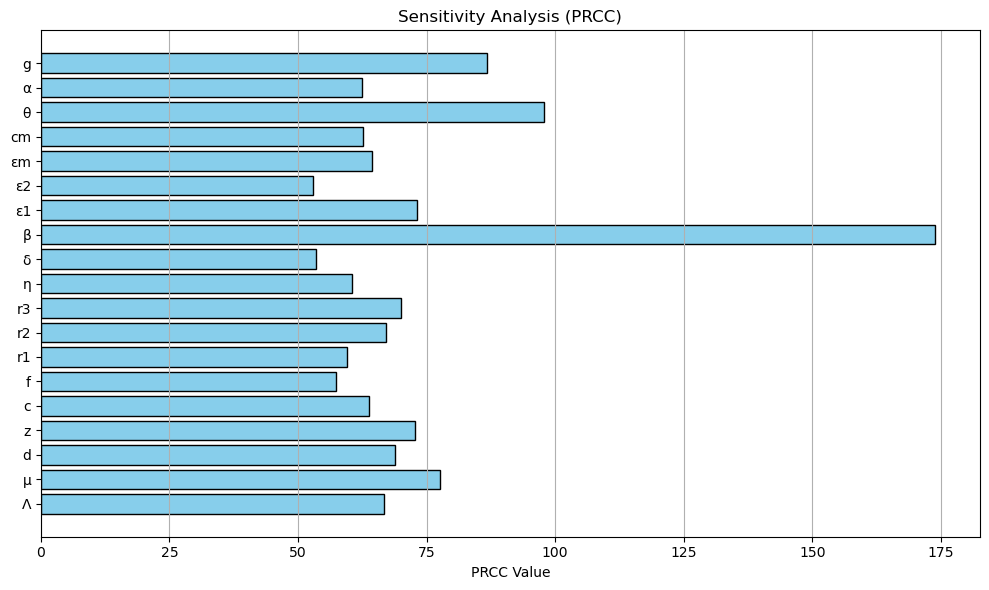

In [12]:
pip install SALib numpy


In [1]:
import sympy as sp
# FORWARD SENSITIVITY INDEX CODE 

# Define parameters symbolically
Lambda, mu, alpha, d, z, c, f, g, r1, r2, r3, delta, epsilon1, epsilon2, epsilon_m, cm, eta, beta, s = sp.symbols(
    "Lambda mu alpha d z c f g r1 r2 r3 delta epsilon1 epsilon2 epsilon_m cm eta beta s"
)

# Define intermediate variables
m = Lambda / mu
beta_0 = beta * (1 - epsilon_m * cm) * (1 - s)
k1 = -(g + c + mu)
k2 = -(d * z + mu)
k3 = -(r1 + mu)
k4 = -(r2 + eta + mu)
k5 = -(r3 + mu)

# Define R0 symbolically
R0 = (
    m
    * beta_0
    * (c * d * z * k3 * k4 * epsilon2 - k2 * (f * g * k4 * k5 - (-1 + f) * g * k3 * (k5 * epsilon1 - eta * epsilon2)))
    / (k1 * k2 * k3 * k4 * k5)
)

# List of parameters
parameters = [
    Lambda, mu, alpha, d, z, c, f, g, r1, r2, r3, delta, epsilon1, epsilon2, epsilon_m, cm, eta, beta, s
]

# Define parameter values
parameter_values = {
    Lambda: 0.46436,
    mu: 0.61,
    alpha: 0.85,
    d: 0.05,
    z: 1 / 14,
    c: 0.07,
    f: 0.7,
    g: 0.2471,
    r1: 0.0714,
    r2: 1 / 21,
    r3: 0.02,
    delta: 0.0036,
    epsilon1: 0.48,
    epsilon2: 0.48,
    epsilon_m: 0.5,
    cm: 0.48,
    eta: 0.04,
    beta: 0.512,
    s: 0.3,
}

# Compute R0 with parameter values
R0_value = R0.subs(parameter_values)

# Compute sensitivity indices
sensitivity_indices = {}
for param in parameters:
    # Partial derivative of R0 with respect to the parameter
    partial_derivative = sp.diff(R0, param)
    
    # Sensitivity index formula: (\partial R0 / \partial param) * (param / R0)
    sensitivity_index = (partial_derivative * param / R0).subs(parameter_values)
    sensitivity_indices[param] = sensitivity_index

# Display results
print("R0 value:", R0_value)
print("\nSensitivity Indices:")
for param, index in sensitivity_indices.items():
    print(f"{param}: {index}")


R0 value: -0.0689752840072068

Sensitivity Indices:
Lambda: 1
mu: -2.56076238795907
alpha: 0
d: 0.00100075267037165
z: 0.00100075267037165
c: -0.0744976487195186
f: 0.412698120926667
g: 0.732463348212562
r1: -0.0862484345297690
r2: -0.0120060464272073
r3: -0.000365315004246986
delta: 0
epsilon1: 0.165387769402850
epsilon2: 0.0115074226337801
epsilon_m: -0.315789473684211
cm: -0.315789473684211
eta: 0.000415731756882397
beta: 1
s: -0.428571428571429
